In [1]:
%pylab inline
import pandas as pd
import numpy as np
%config InlineBackend.figure_format = 'retina'
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [2]:
from somde import SomNode

In [3]:
dataname = '../slideseq_data/Puck_180819_19_'
df = pd.read_csv(dataname+'count.csv',sep=',',index_col=1)
corinfo = pd.read_csv(dataname+'idx.csv',sep=',',index_col=0)
del(df['ENSEMBL'])
print(df.shape)

(2555, 9699)


In [4]:
corinfo["total_count"]=df.sum(0)

In [5]:
X=corinfo[['x','y']].values.astype(np.float32)

using 22*22 SOM nodes for 9699 points
CPU times: user 6.36 s, sys: 79.1 ms, total: 6.44 s
Wall time: 410 ms


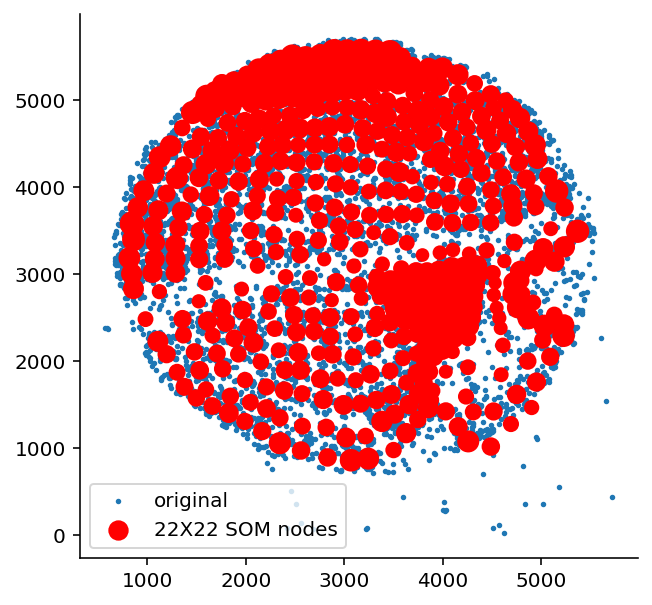

In [6]:
%time som = SomNode(X,20)
figsize(5,5)
som.view()

In [7]:
som.reTrain(100)

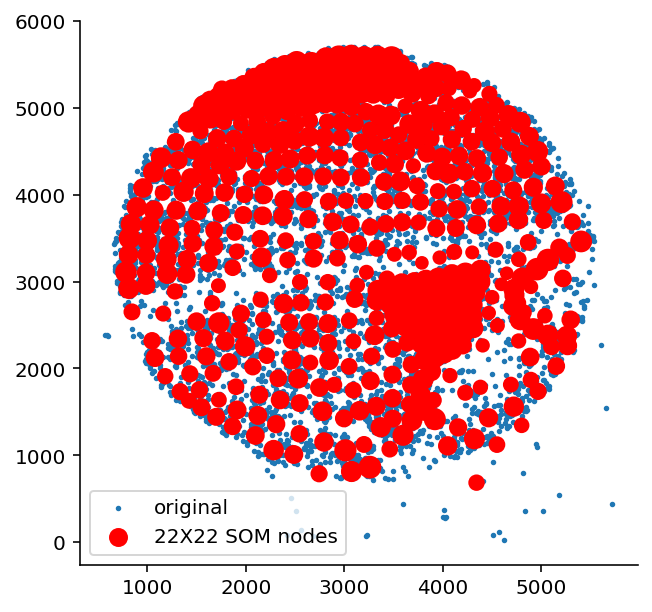

In [8]:
som.view()

In [9]:
%time ndf,ninfo = som.mtx(df)

CPU times: user 1.58 s, sys: 2.03 ms, total: 1.58 s
Wall time: 1.55 s


In [10]:
nres = som.norm()

In [12]:
result, SVnum =som.run()

 35%|███▌      | 904/2555 [00:01<00:02, 773.11it/s]/data1/hms/workspace/somde/somde/util.py:310: RuntimeWarning: divide by zero encountered in double_scalars
  s2_logdelta = 1. / (derivative(LL_obj, np.log(max_delta), n=2) ** 2)

Models: 100%|██████████| 10/10 [00:47<00:00,  4.71s/it]


In [13]:
from somde.util import *

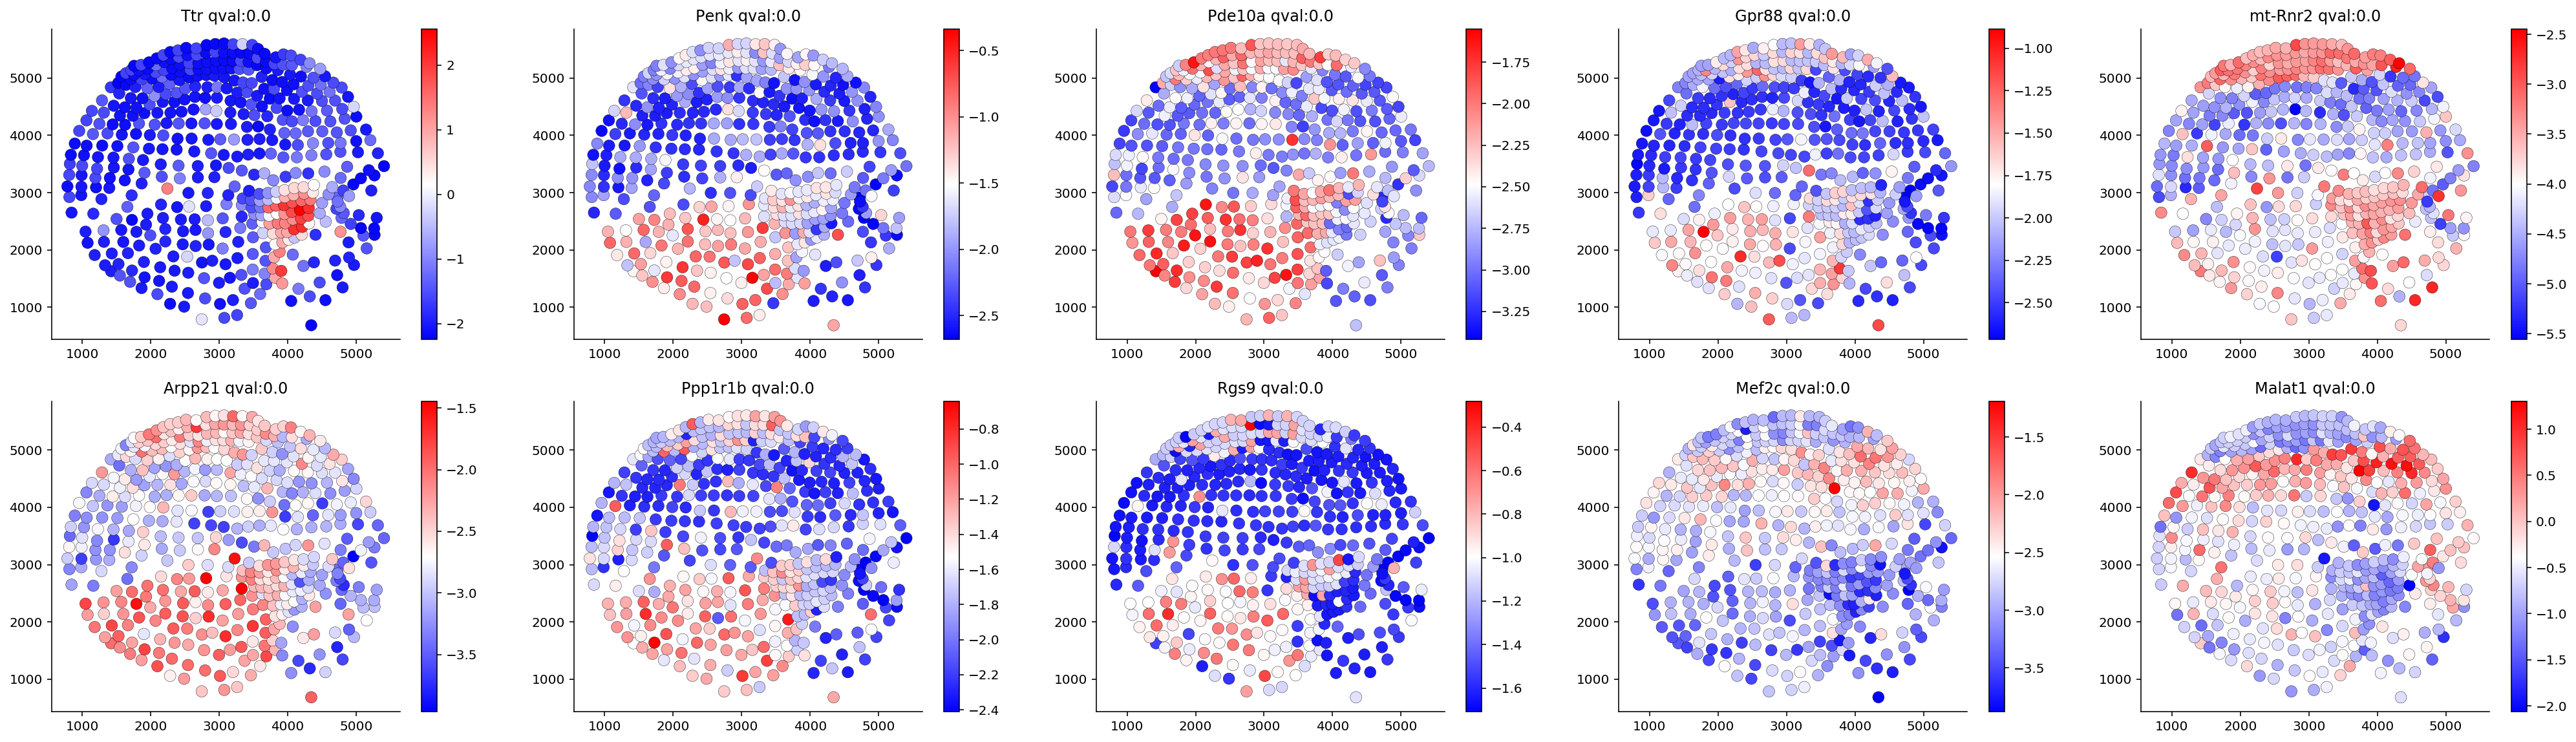

In [14]:
plotgene(ninfo[['x','y']].values,nres.T,result.g.to_list()[:10],result,sp=80,lw=0.2,plotsize=5)

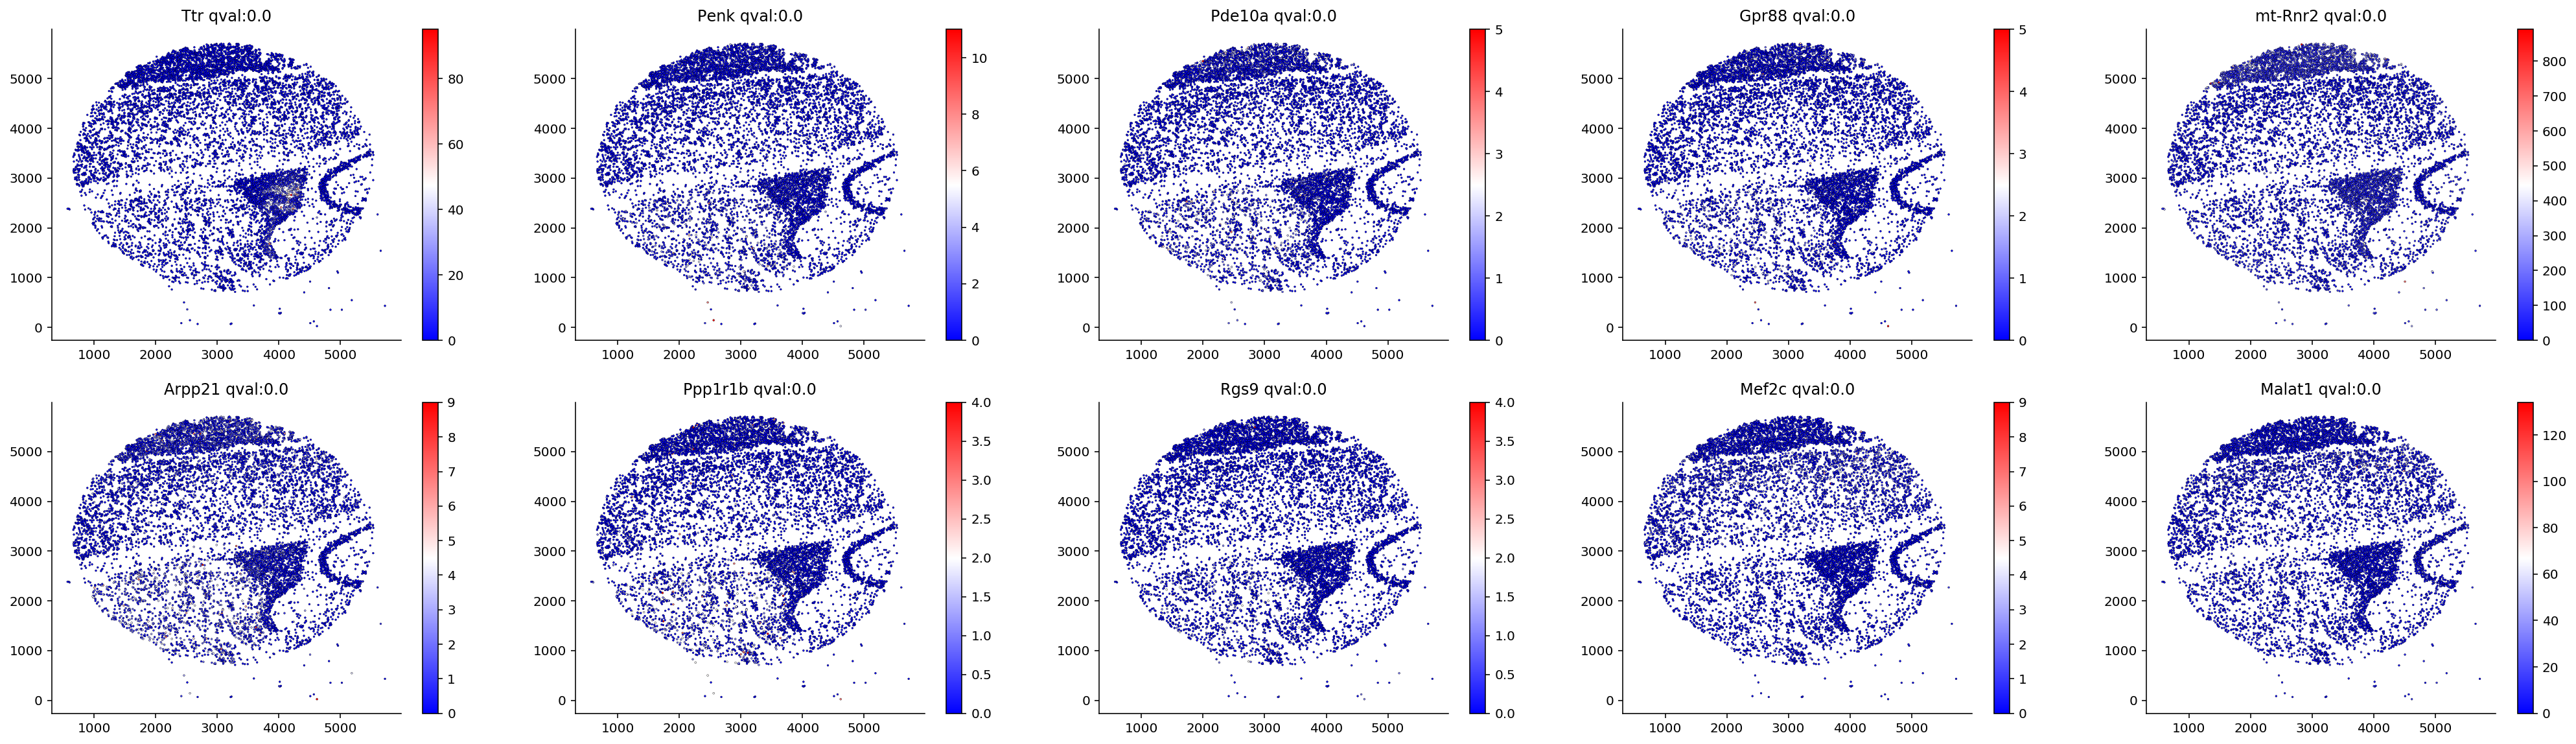

In [20]:
plotgene(corinfo[['x','y']].values,df,result.g.to_list()[:10],result,sp=2,lw=0.2,plotsize=5)

In [16]:
SVnum

418

In [17]:
result

FSV  M        g           l     max_delta      max_ll  \
1425  6.694478e-01  4      Ttr  426.943958  4.651793e-01 -395.795525   
2001  5.043513e-01  4     Penk  809.055404  8.154067e-01 -193.734989   
1993  5.624185e-01  4   Pde10a  809.055404  6.455544e-01  -94.945275   
1754  4.781142e-01  4    Gpr88  809.055404  9.056851e-01  -63.421045   
1439  5.315770e-01  4  mt-Rnr2  426.943958  8.301736e-01 -292.509342   
...            ... ..      ...         ...           ...         ...   
194   2.061139e-09  4   Mrpl18   33.108637  4.851652e+08  -98.144461   
269   2.061139e-09  4    Psmb4   33.108637  4.851652e+08 -142.128691   
77    2.061139e-09  4    Cisd1   33.108637  4.851652e+08 -111.272008   
398   2.061139e-09  4  Zcchc17   33.108637  4.851652e+08 -103.935510   
79    2.061139e-09  4    Clcn3   33.108637  4.851652e+08 -125.340696   

      max_mu_hat  max_s2_t_hat model    n    s2_FSV   s2_logdelta      time  \
1425   -1.583777  5.593712e-01    SE  484  0.000112  2.540758e-03  0.001365   
2001   -1.798337  1.902689e-01    SE  484  0.000523  9.804183e-03  0.001182   
1993   -2.505510  2.173846e-01    SE  484  0.000555  1.065773e-02  0.001324   
1754   -2.114656  1.447940e-01    SE  484  0.000545  1.023476e-02  0.001175   
1439   -3.973416  8.442656e-01    SE  484  0.000173  3.266619e-03  0.001287   
...          ...           ...   ...  ...       ...           ...       ...   
194    -1.793409  6.810359e-09    SE  484  4.765617  8.122318e+17  0.000955   
269    -1.428956  4.425824e-09    SE  484  4.197127  7.153407e+17  0.000947   
77     -2.283666  1.094031e-08    SE  484  4.108167  7.001787e+17  0.000846   
398    -2.429434  1.235066e-08    SE  484  3.313982  5.648212e+17  0.002947   
79     -2.030450  8.700140e-09    SE  484  2.791658  4.757984e+17  0.001781   

             BIC  max_ll_null         LLR      pval      qval  
1425  816.319389  -662.667964  266.872439  0.000000  0.000000  
2001  412.198317  -381.725597  187.990608  0.000000  0.000000  
1993  214.618890  -267.812053  172.866778  0.000000  0.000000  
1754  151.570429  -227.380199  163.959154  0.000000  0.000000  
1439  609.747024  -446.337735  153.828393  0.000000  0.000000  
...          ...          ...         ...       ...       ...  
194   221.017263   -98.144979    0.000517  0.981855  0.981855  
269   308.985721  -142.129208    0.000517  0.981855  0.981855  
77    247.272355  -111.272525    0.000517  0.981855  0.981855  
398   232.599359  -103.936027    0.000517  0.981855  0.981855  
79    275.409732  -125.341214    0.000517  0.981855  0.981855  

[2555 rows x 18 columns]